In [3]:
pip install astropy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 4.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 5.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits
import glob

In [2]:
PSR_DATA = dict()
files = glob.glob('ar_files/*')
for file in files:
    PSR_JNAME = file[9:19]
    with fits.open(file) as hdul:
        data = np.array(hdul[4].data['DATA'][0], dtype='int64')
        scales = hdul[4].data[0]['DAT_SCL'].reshape((4, 8))
        offsets = hdul[4].data[0]['DAT_OFFS'].reshape((4, 8))
        data
        PSR_DATA[PSR_JNAME] = data
        

In [3]:
hdul = fits.open('ar_files/J0905-5127_2019-11-18-22:58:08_zap.8chTS.fluxcal.ar') #'ar_files/J0646+0905_2019-11-18-22:23:12_zap.8chTS.fluxcal.ar'
# hdul = fits.open('ar_files/J0646+0905_2019-11-18-22:23:12_zap.8chTS.fluxcal.ar') #'ar_files/J0646+0905_2019-11-18-22:23:12_zap.8chTS.fluxcal.ar'


In [5]:
hdul[4].header

XTENSION= 'BINTABLE'           / ***** Subintegration data  *****               
BITPIX  =                    8 / N/A                                            
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                65996 / width of table in bytes                        
NAXIS2  =                    1 / Number of rows in table (NSUBINT)              
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   21 / Number of fields per row                       
TTYPE1  = 'INDEXVAL'           / Optionally used if INT_TYPE != TIME            
TFORM1  = '1D      '           / Double                                         
TTYPE2  = 'TSUBINT '           / Length of subintegration                       
TFORM2  = '1D      '           / Double                                         
TTYPE3  = 'OFFS_SUB'        

-32751 32750


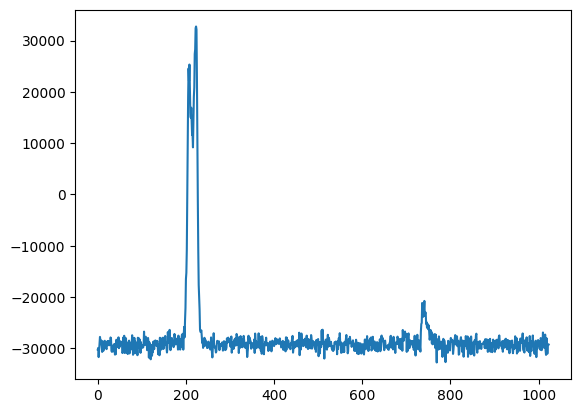

In [76]:
data = hdul[4].data[0]['DATA'][0][0]
plt.plot(data)
print(np.min(data), np.max(data))

In [79]:
print(hdul[4].data[0]['DAT_SCL'])
print(hdul[4].data[0]['DAT_WTS'])
print(hdul[4].data[0]['DAT_OFFS'])
print(hdul[4].data[0]['DAT_SCL'] * hdul[4].data[0]['DAT_OFFS'])

[0.00118738 0.0008986  0.00074209 0.00062037 0.00046742 0.00040207
 0.00035124 0.00031441 0.00106472 0.00038011 0.00056695 0.00048185
 0.00029395 0.00015502 0.00014137 0.00019342 0.00064746 0.00079233
 0.00049378 0.00042111 0.00039645 0.00036819 0.0003247  0.00026709
 0.00020069 0.00019468 0.00019266 0.00016396 0.00014137 0.00012485
 0.00011802 0.00011637]
[28941.78  35167.84  31613.436 26549.322 35015.74  35166.207 27616.021
 30635.428]
[ 8.3903174e+03  7.9004565e+03  7.6750669e+03  7.9316523e+03
  6.8128203e+03  6.6643735e+03  6.8640444e+03  6.8822852e+03
  1.0950414e+01  5.8166000e+01 -2.7231581e+01 -8.9915810e+01
 -9.2342278e+01 -1.6730734e+02 -1.3508263e+02 -1.4707967e+02
  2.7322655e+01 -5.4423412e+01 -2.9574535e+01  7.3823533e+00
 -3.7311352e+01  3.6498749e+01  6.3385735e+01  7.4706154e+01
  6.2831206e+00 -2.5944686e+00 -7.9984627e+01 -3.2517386e+02
 -3.1558752e+01  2.3717058e+01 -1.9249281e+01 -6.6848328e+01]
[ 9.9624739e+00  7.0993714e+00  5.6956224e+00  4.9205484e+00
  3.1844

In [78]:
1/(434566.56 *  4.65611920e-05) * 30000

1482.6575740169274

In [396]:
hdul[4].data[0]['DAT_WTS']

array([28941.78 , 35167.84 , 31613.436, 26549.322, 35015.74 , 35166.207,
       27616.021, 30635.428], dtype='>f4')

In [345]:
hdul[4].data[0]['DAT_FREQ']

array([ 943.83920688, 1040.75168617, 1133.59265191, 1231.66710317,
       1332.58918592, 1429.10116779, 1520.72618285, 1625.58078668],
      dtype='>f8')

In [346]:
hdul[4].data[0]['DAT_SCL']

array([0.00118738, 0.0008986 , 0.00074209, 0.00062037, 0.00046742,
       0.00040207, 0.00035124, 0.00031441, 0.00106472, 0.00038011,
       0.00056695, 0.00048185, 0.00029395, 0.00015502, 0.00014137,
       0.00019342, 0.00064746, 0.00079233, 0.00049378, 0.00042111,
       0.00039645, 0.00036819, 0.0003247 , 0.00026709, 0.00020069,
       0.00019468, 0.00019266, 0.00016396, 0.00014137, 0.00012485,
       0.00011802, 0.00011637], dtype='>f4')

In [377]:
hdul[4].data[0]['DAT_OFFS']

array([ 8.3903174e+03,  7.9004565e+03,  7.6750669e+03,  7.9316523e+03,
        6.8128203e+03,  6.6643735e+03,  6.8640444e+03,  6.8822852e+03,
        1.0950414e+01,  5.8166000e+01, -2.7231581e+01, -8.9915810e+01,
       -9.2342278e+01, -1.6730734e+02, -1.3508263e+02, -1.4707967e+02,
        2.7322655e+01, -5.4423412e+01, -2.9574535e+01,  7.3823533e+00,
       -3.7311352e+01,  3.6498749e+01,  6.3385735e+01,  7.4706154e+01,
        6.2831206e+00, -2.5944686e+00, -7.9984627e+01, -3.2517386e+02,
       -3.1558752e+01,  2.3717058e+01, -1.9249281e+01, -6.6848328e+01],
      dtype='>f4')

In [359]:
data = np.array(hdul[4].data['DATA'][0], dtype='int64')
print(data.shape)
scales = hdul[4].data[0]['DAT_SCL'].reshape((4, 8))
DATA = np.moveaxis(np.tile(scales, (1024, 1, 1)), 0, -1) * (data + np.moveaxis(np.tile(offsets, (1024, 1, 1)), 0, -1))
offsets = hdul[4].data[0]['DAT_OFFS'].reshape((4, 8))

(4, 8, 1024)


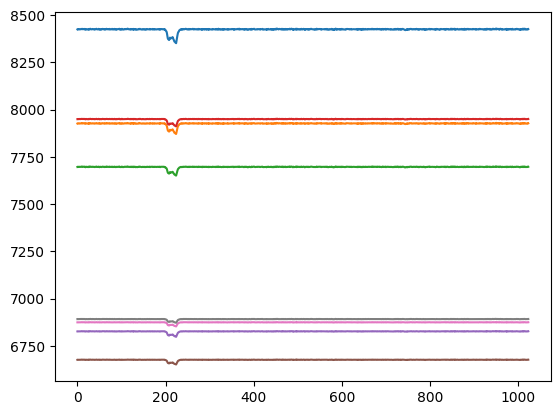

In [376]:
for i in range(0, 8):
    plt.plot(hdul[4].data[0]['DAT_SCL'][i] * data[1][0] + hdul[4].data[0]['DAT_OFFS'][i] )

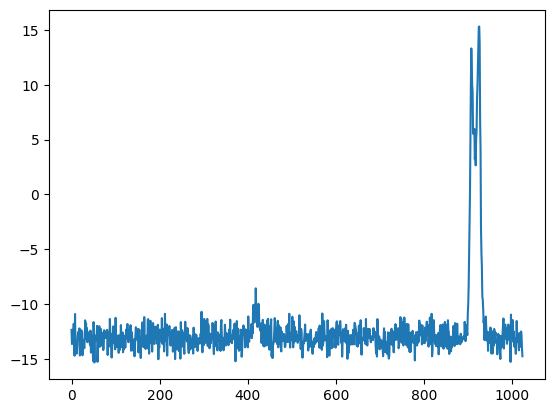

In [415]:
plt.plot(data[0][4] * hdul[4].data[0]['DAT_SCL'][4])

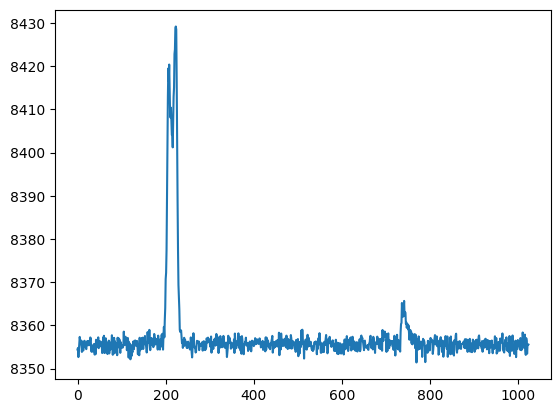

In [401]:
plt.plot(hdul[4].data[0]['DAT_SCL'][0] * data[0][0] + hdul[4].data[0]['DAT_OFFS'][0])

In [122]:
# First index - Stokes parameter, second - frequency band
# Stokes parameters are stored in a following way: I, Q, U, V


In [123]:
PSR_DATA.keys()

dict_keys(['J1709-3841', 'J2253+1516', 'J1534-5405', 'J1538+2345', 'J1612-5805', 'J1848+0604', 'J0807-5421', 'J0820-3921', 'J1638-4725', 'J0536-7543', 'J1840-0559', 'J1844-0538', 'J1305-6455', 'J1810-5338', 'J1509-5850', 'J1826-1419', 'J1038-5831', 'J1210-5559', 'J1926-0652', 'J0838-2621', 'J1424-5822', 'J1645-0317', 'J1915+0752', 'J0942-5552', 'J0912-3851', 'J0932-3217', 'J1935+1745', 'J1321-5922', 'J1927+2234', 'J2051+1248', 'J1814-1744', 'J2108-3429', 'J1549+2113', 'J0614+2229', 'J1731-3123', 'J1525-5417', 'J0941-5244', 'J1415-6621', 'J0955-5304', 'J1550-5418', 'J0835-3707', 'J1743-1351', 'J1601-5335', 'J1748-2021', 'J1918+1541', 'J1842+0358', 'J1233-6344', 'J1634-5107', 'J1743-3153', 'J1945-0040', 'J1244-5053', 'J1903+0654', 'J1758-2540', 'J1900-7951', 'J1726-3635', 'J1843-1507', 'J1136-5525', 'J1152-6012', 'J1824-1423', 'J2116+1414', 'J1906+0641', 'J1527-3931', 'J1748-1300', 'J1739-2903', 'J1800-0125', 'J0932-5327', 'J1814+1130', 'J0511-6508', 'J1012-5830', 'J0725-1635', 'J1738-32

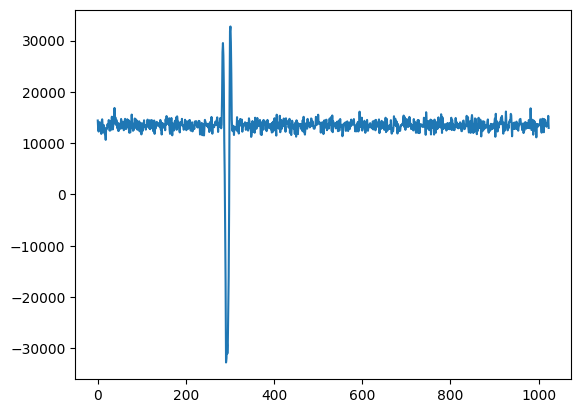

In [149]:
plt.plot(PSR_DATA['J2324-6054'][1][0])

In [145]:
PA = np.arctan2(PSR_DATA['J2324-6054'][2][1], PSR_DATA['J2324-6054'][1][1]) / 2 * 180 / np.pi
L = np.sqrt(PSR_DATA['J2324-6054'][2][1]**2 + PSR_DATA['J2324-6054'][1][1]**2)
I = PSR_DATA['J2324-6054'][0][1] - np.min(PSR_DATA['J2324-6054'][0][1])

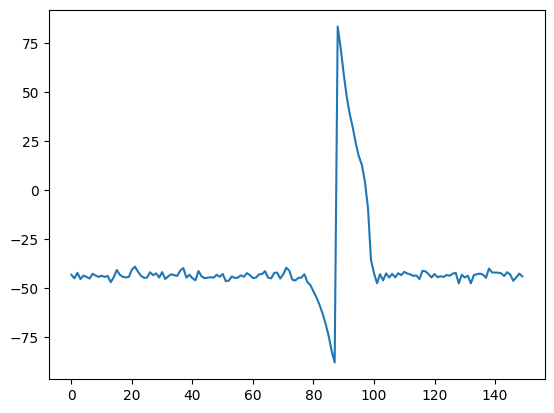

In [146]:
plt.plot(PA[200:350])

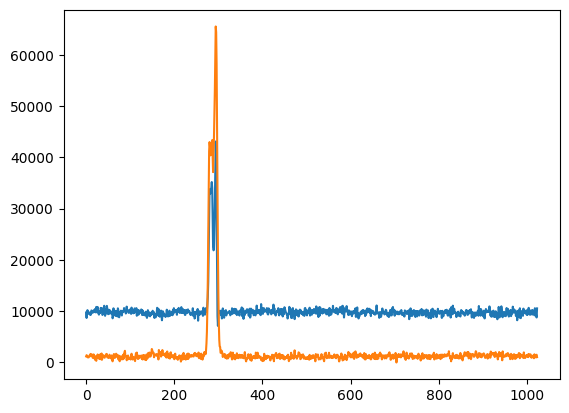

In [147]:
plt.plot(L)
plt.plot(I)

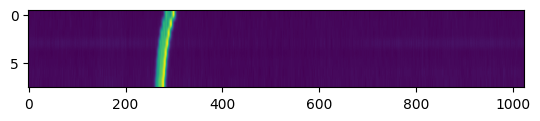

In [46]:
plt.imshow(PSR_DATA['J2324-6054'][0], aspect=20)

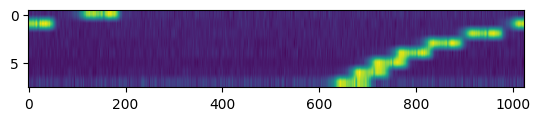

In [49]:
plt.imshow(PSR_DATA['J1604-7203'][0], aspect=20)
